# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import time

# Import Data

In [2]:
ann_data = pd.read_csv("Churn_Modelling.csv")
ann_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
ann_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
ann_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
ann = ann_data.copy()#DeepCopy

## Visualization

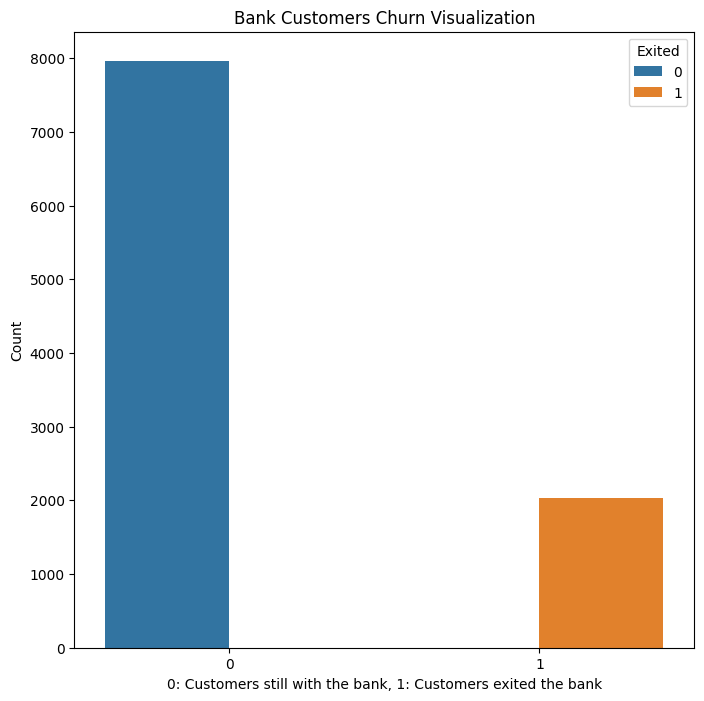

In [6]:
# Visualizing the count of 'exited customers' in the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=ann,hue = 'Exited')
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

Target Variable Vs Features:

In [7]:
sns.set(rc = {"figure.figsize": (8, 6)})

<Axes: xlabel='Exited', ylabel='Age'>

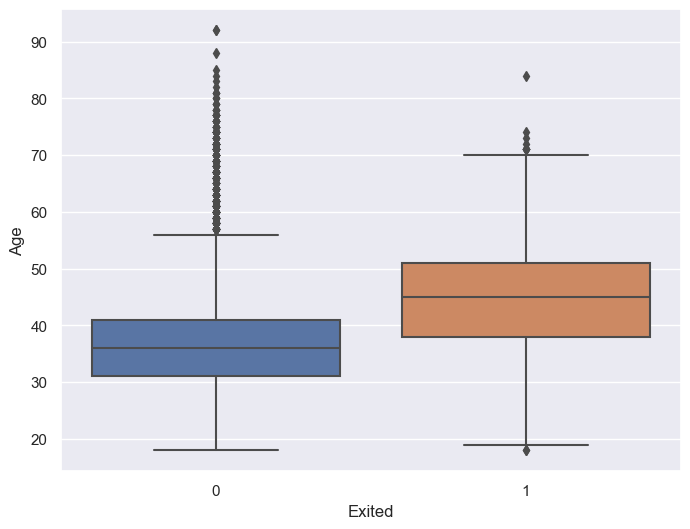

In [8]:
sns.boxplot(x="Exited", y="Age", data=ann)

<Axes: xlabel='Exited', ylabel='NumOfProducts'>

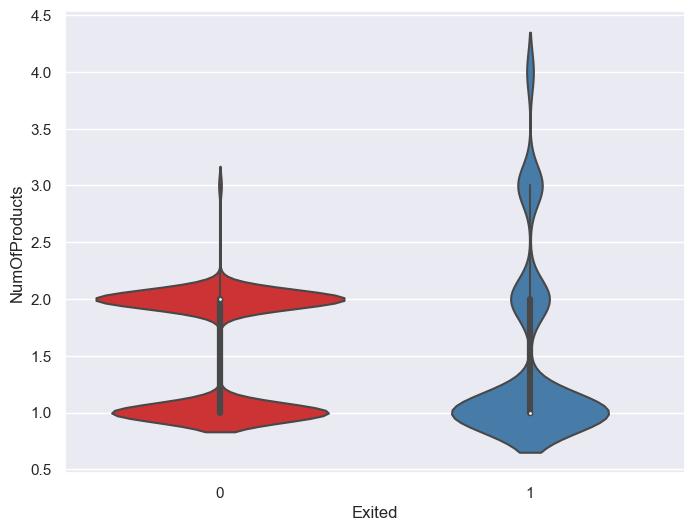

In [9]:
sns.violinplot(x="Exited", y="NumOfProducts", data=ann, palette="Set1")

<Axes: xlabel='Geography', ylabel='Exited'>

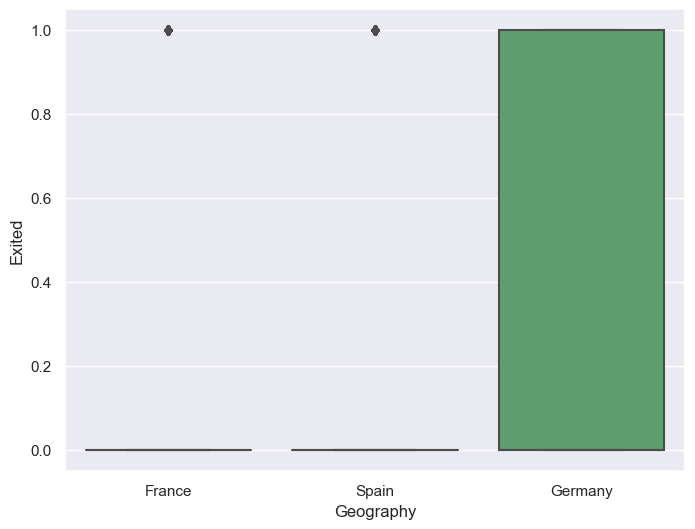

In [10]:
sns.boxplot(x="Geography", y="Exited", data=ann)

## Correlation

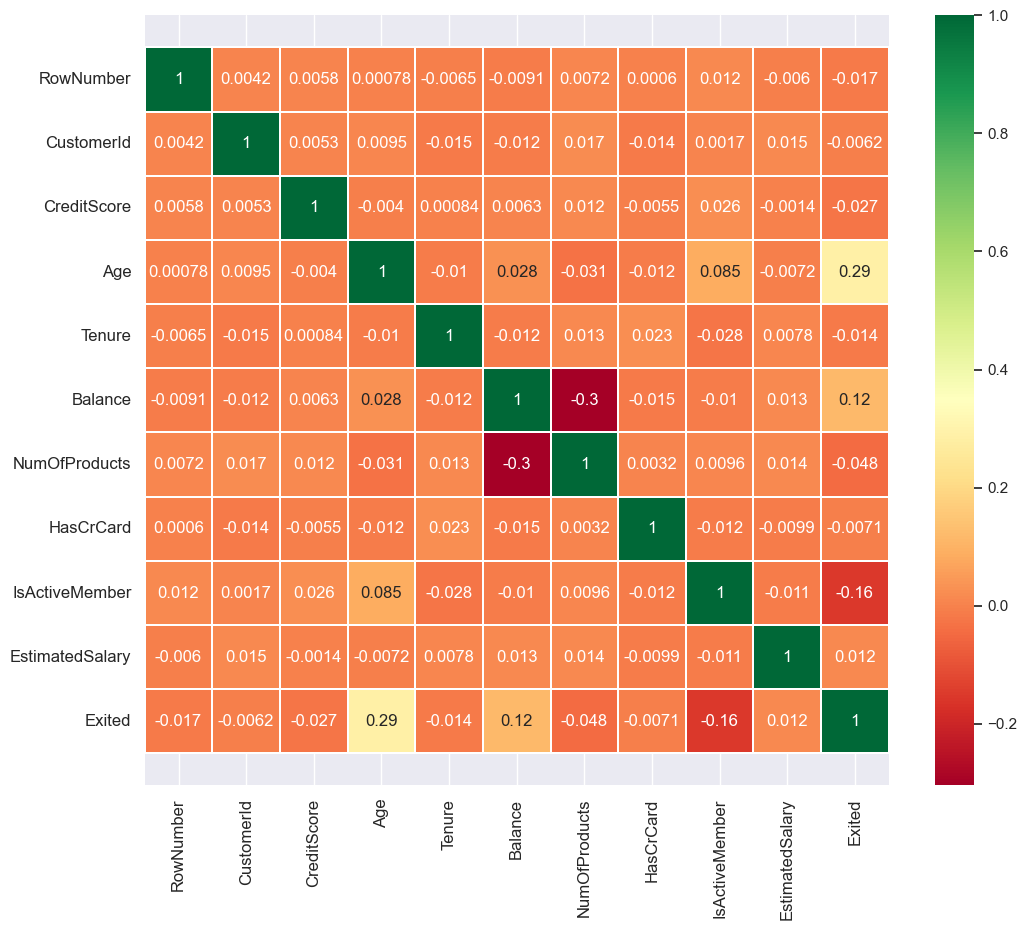

In [11]:
corr = ann.corr(numeric_only = True)
ax = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.1,annot_kws={'size':12})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [12]:
ann.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
ann.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Encoding Categorical Data

Converting categorical data into a numerical format using the get_dummies() function of the pandas library so that the data can be understood by the machine and can be inserted into the ANN Model for training and prediction.

In [13]:
# Converting 'Geography' and 'Gender' column
geography = pd.get_dummies(ann['Geography'], drop_first=True)
gender = pd.get_dummies(ann['Gender'], drop_first=True)

In [14]:
# Appending columns to original dataframe
ann = pd.concat([ann, geography, gender], axis=1)
ann.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [15]:
ann.drop(['Geography', 'Gender'], axis=1, inplace=True)

## Input and Output variable

In [16]:
X = ann.drop('Exited', axis=1)
y = ann['Exited']

## Spliting

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## PreProcessing

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building the Neural Network

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [25]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [26]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 200)

Epoch 1/200


750/750 [==============================] - 3s 2ms/step - loss: 0.4866 - accuracy: 0.7947
Epoch 2/200
750/750 [==============================] - 2s 2ms/step - loss: 0.4304 - accuracy: 0.7947
Epoch 3/200
750/750 [==============================] - 2s 2ms/step - loss: 0.4246 - accuracy: 0.7948
Epoch 4/200
750/750 [==============================] - 2s 2ms/step - loss: 0.4199 - accuracy: 0.8245
Epoch 5/200
750/750 [==============================] - 2s 2ms/step - loss: 0.4172 - accuracy: 0.8295
Epoch 6/200
750/750 [==============================] - 2s 2ms/step - loss: 0.4157 - accuracy: 0.8307
Epoch 7/200
750/750 [==============================] - 2s 2ms/step - loss: 0.4142 - accuracy: 0.8303
Epoch 8/200
750/750 [==============================] - 2s 2ms/step - loss: 0.4135 - accuracy: 0.8320
Epoch 9/200
750/750 [==============================] - 2s 2ms/step - loss: 0.4121 - accuracy: 0.8325
Epoch 10/200
750/750 [==============================] - 2s 2ms/step - loss: 0.4117 - accuracy: 0.8319
E

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

79/79 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1950,   53],
       [ 344,  153]], dtype=int64)

In [29]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 84.11999999999999%


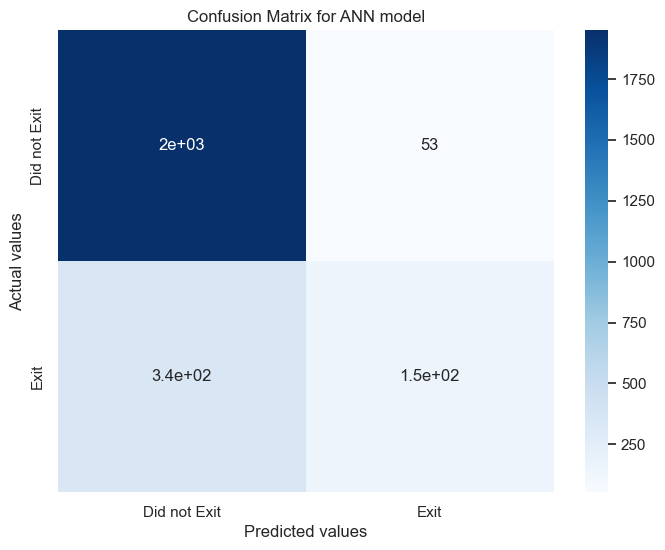

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()